In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

# Load the dataset
df = pd.read_csv("/content/sample_data/salaries (2).csv")

# Display the first few rows of the dataset
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [7]:
# Summary statistics
df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


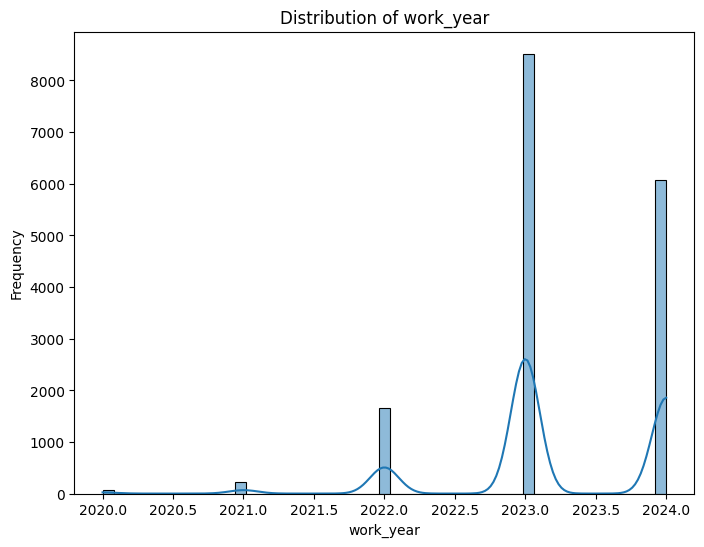

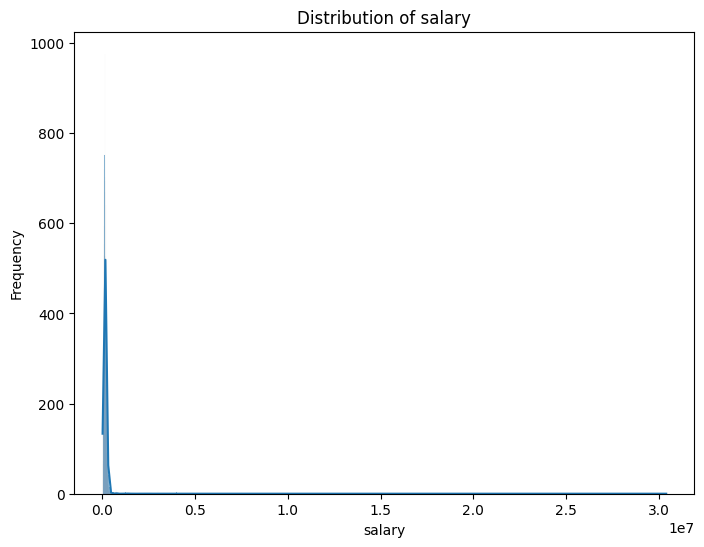

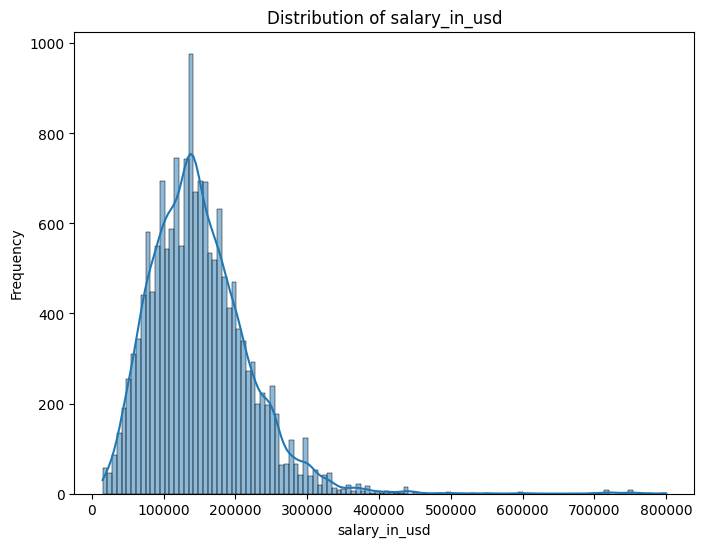

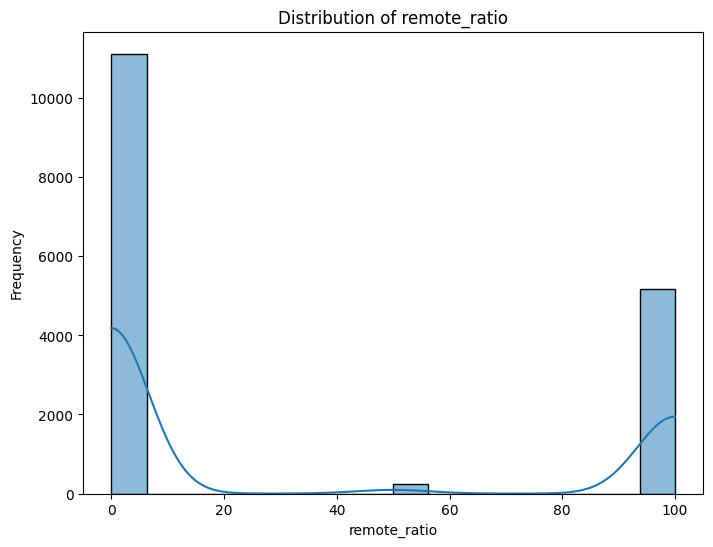

In [8]:
# Distribution of numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

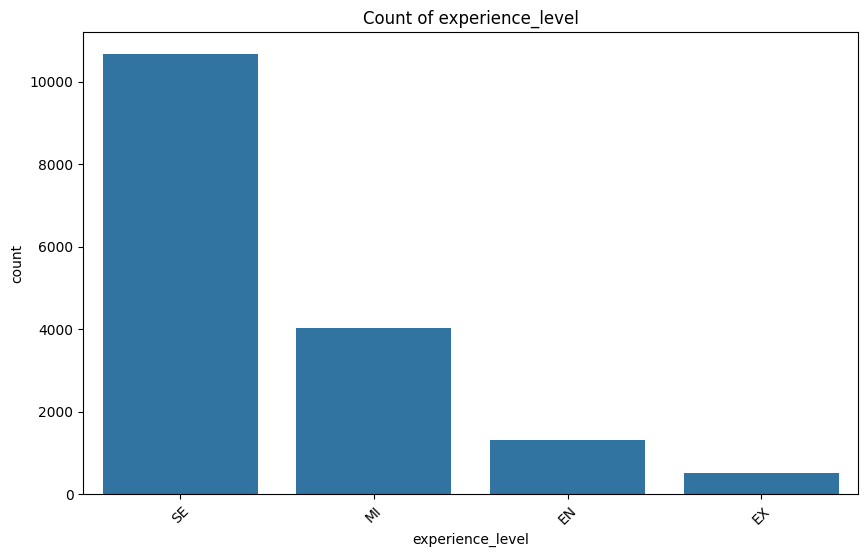

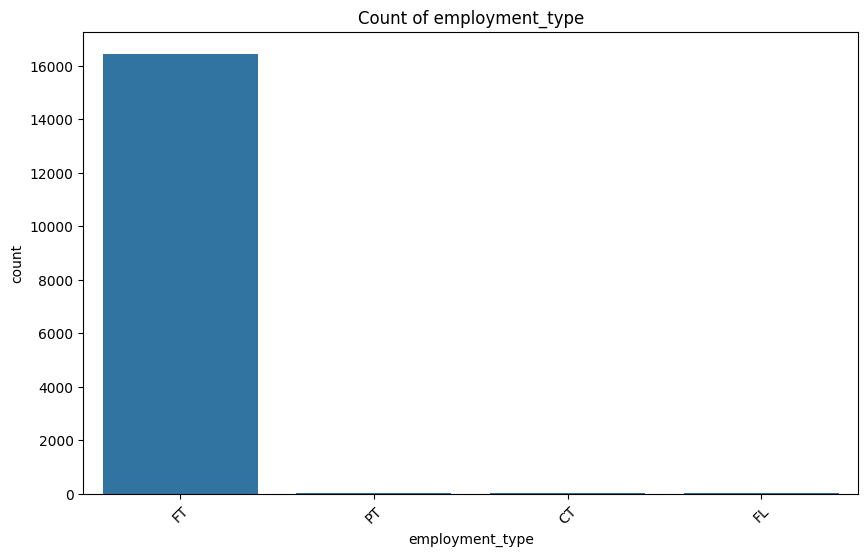

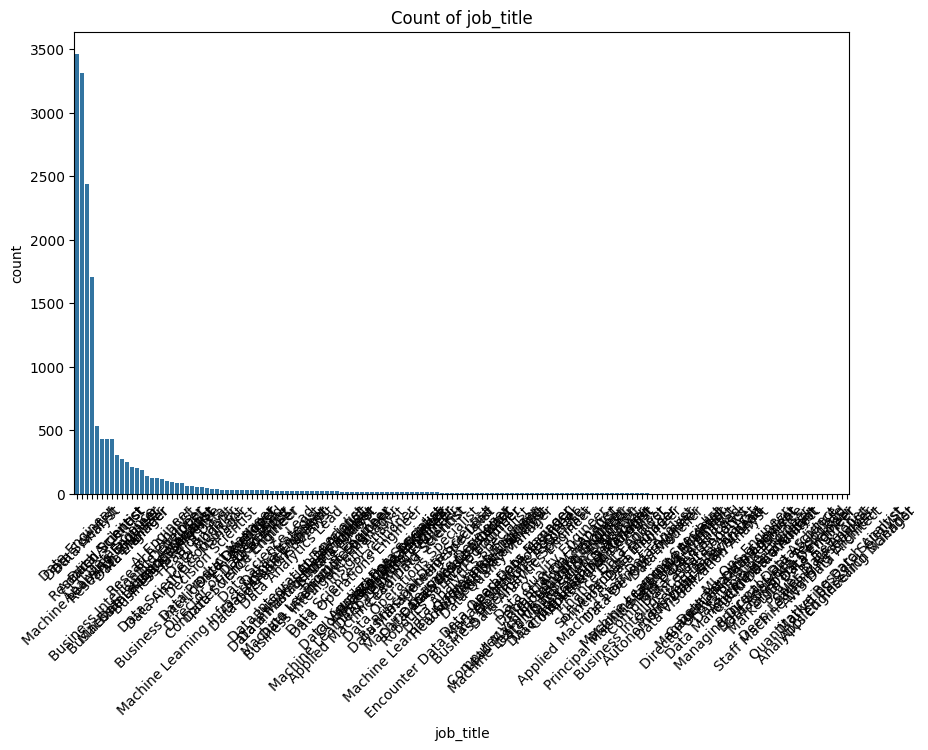

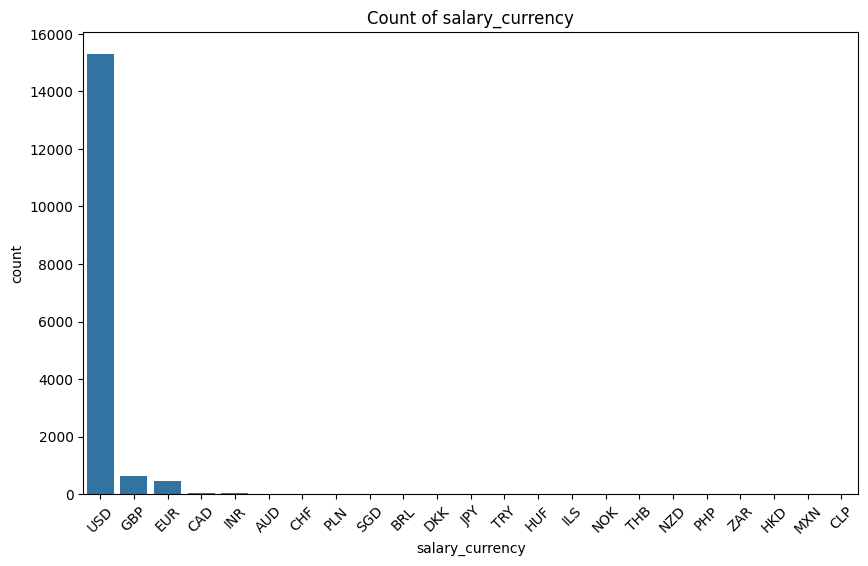

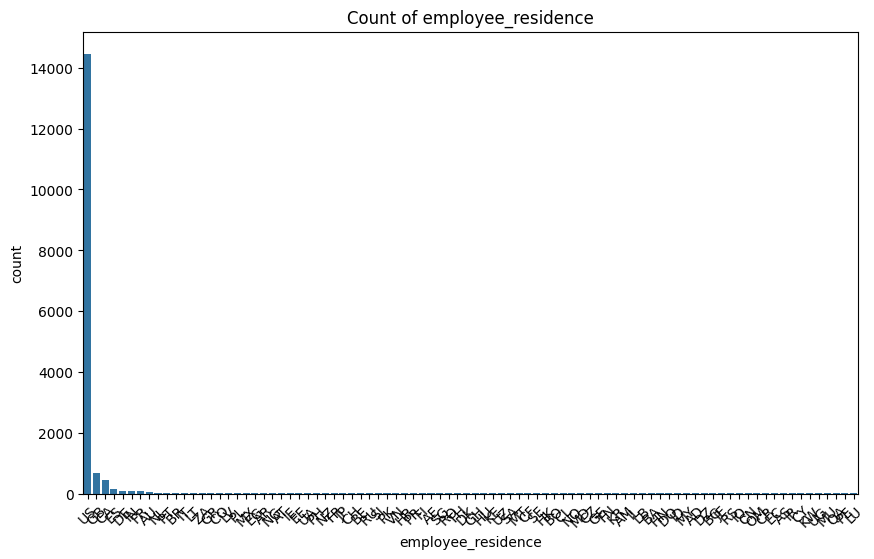

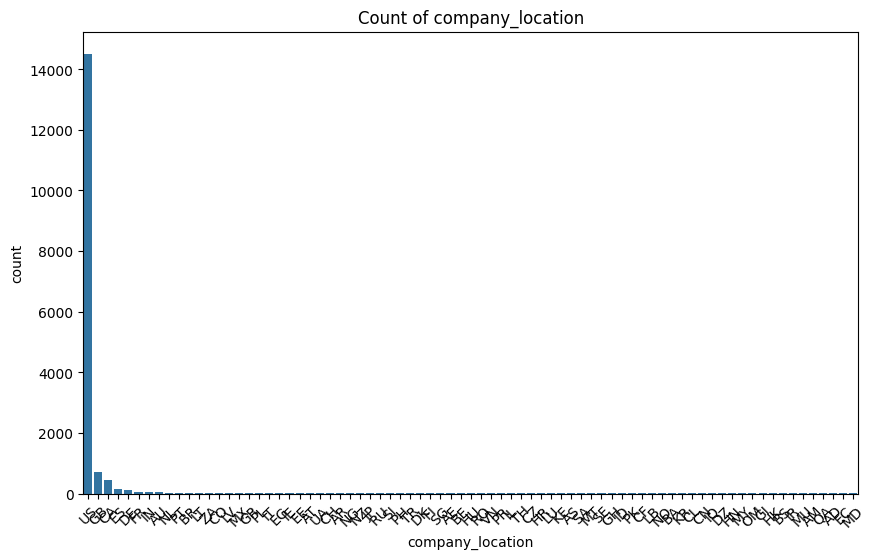

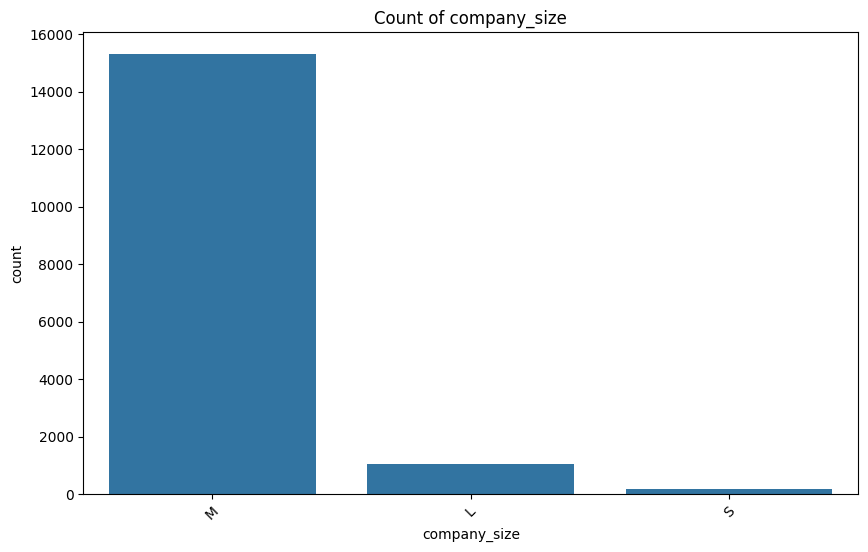

In [9]:
# Relationship between categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

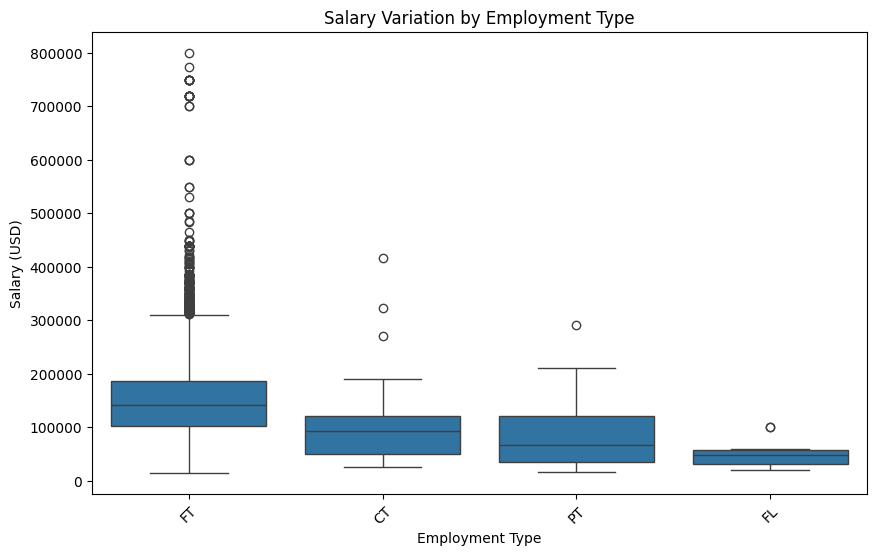

In [10]:
# Visualize the effect of employment_type on salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Variation by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

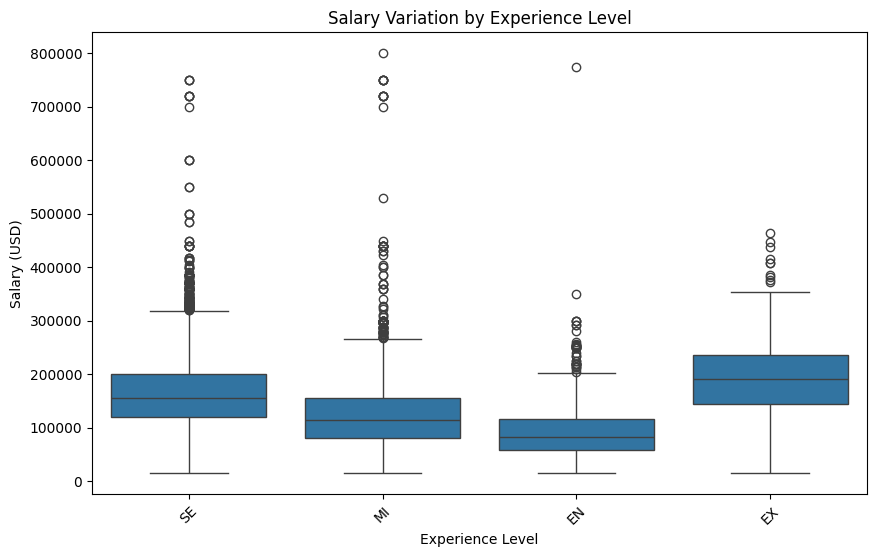

In [11]:
# Visualize the effect of experience_level on salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Variation by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

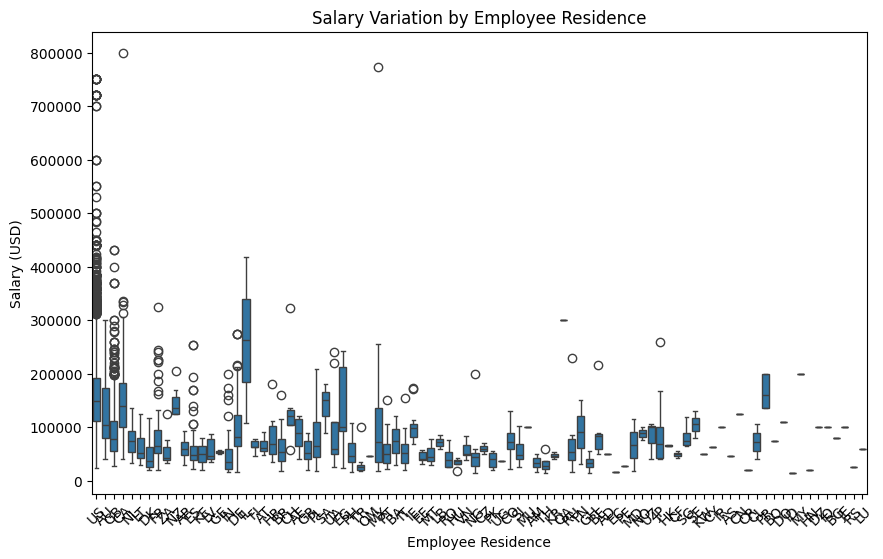

In [12]:
# Visualize the effect of employee_residence on salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=df)
plt.title('Salary Variation by Employee Residence')
plt.xlabel('Employee Residence')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Feature Engineering
current_year = 2024  # Update with the current year
df['years_of_experience'] = current_year - df['work_year']

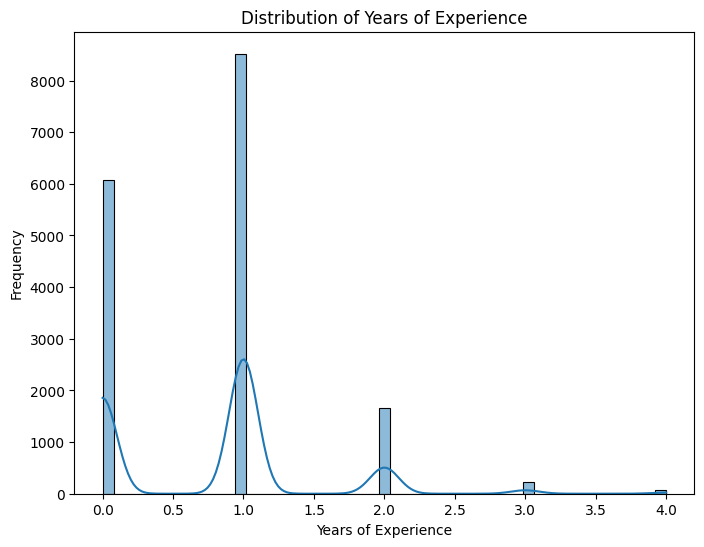

In [14]:
# Visualization of 'years_of_experience'
plt.figure(figsize=(8, 6))
sns.histplot(df['years_of_experience'], kde=True)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
job_title_matrix = vectorizer.fit_transform(df['job_title'])
job_title_df = pd.DataFrame(job_title_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, job_title_df], axis=1)

<ipython-input-16-cceba8740527>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_freq.values, y=job_title_freq.index, palette='viridis')


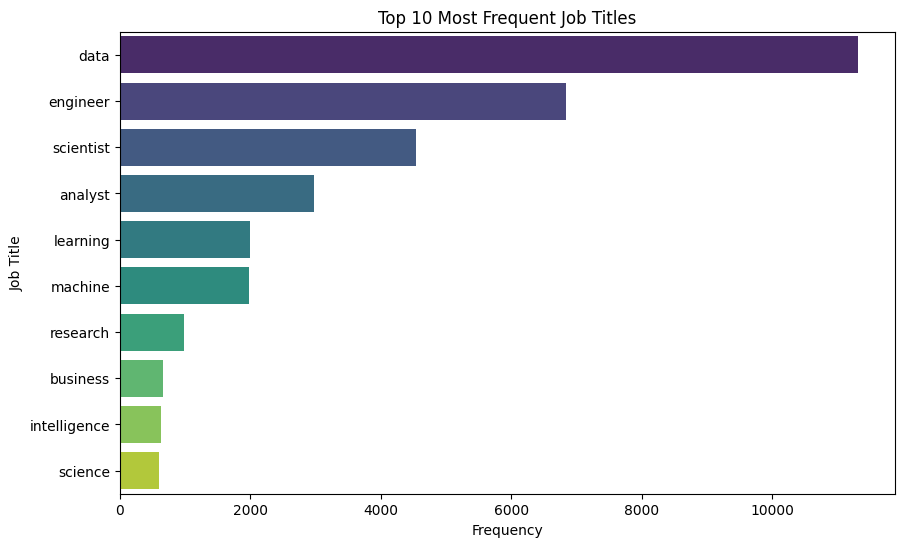

In [16]:
# Visualization of job title frequency
top_n = 10  # Define the number of top job titles to display
job_title_freq = job_title_df.sum().sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=job_title_freq.values, y=job_title_freq.index, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

In [17]:
# Handling Categorical Variables
df_encoded = pd.get_dummies(df, columns=['employment_type', 'experience_level', 'employee_residence'])
frequency_map = df['job_title'].value_counts(normalize=True)
df_encoded['job_title_freq_encoded'] = df['job_title'].map(frequency_map)

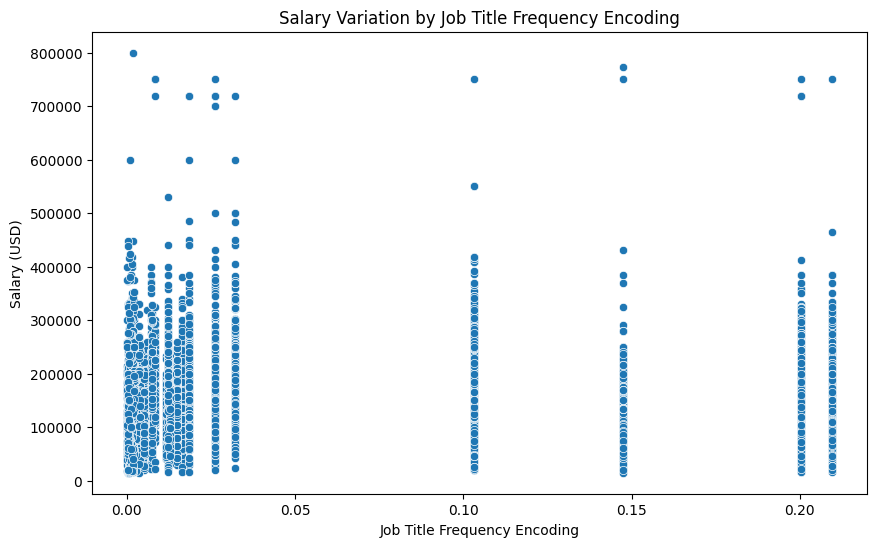

In [18]:
# Visualize the effect of job_title frequency encoding on salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='job_title_freq_encoded', y='salary_in_usd', data=df_encoded)
plt.title('Salary Variation by Job Title Frequency Encoding')
plt.xlabel('Job Title Frequency Encoding')
plt.ylabel('Salary (USD)')
plt.show()

In [19]:
# Outlier Detection and Treatment
z_scores = stats.zscore(df[num_cols])
abs_z_scores = np.abs(z_scores)
outlier_indices = np.where(abs_z_scores > 3)
outlier_rows = list(set(outlier_indices[0]))
df_no_outliers = df.drop(outlier_rows)

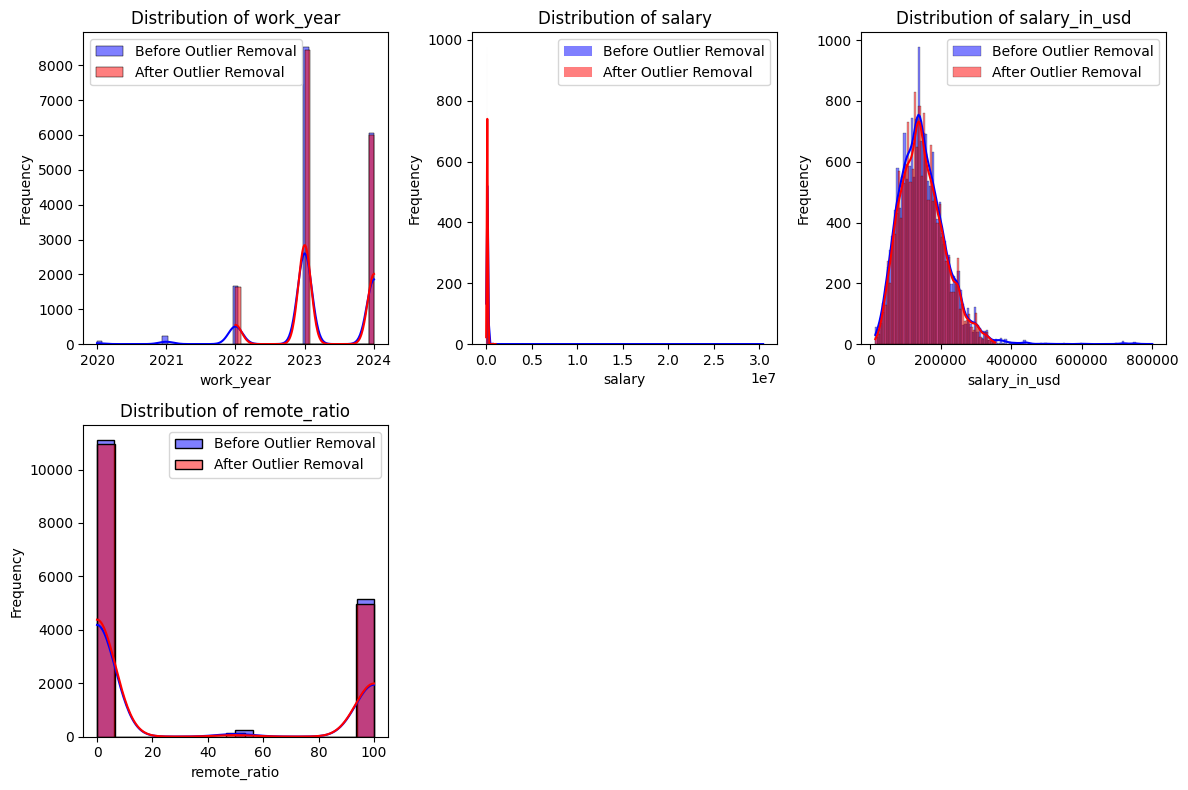

In [20]:
# Visualize the distribution of numerical variables before and after outlier removal
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue', alpha=0.5, label='Before Outlier Removal')
    sns.histplot(df_no_outliers[col], kde=True, color='red', alpha=0.5, label='After Outlier Removal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

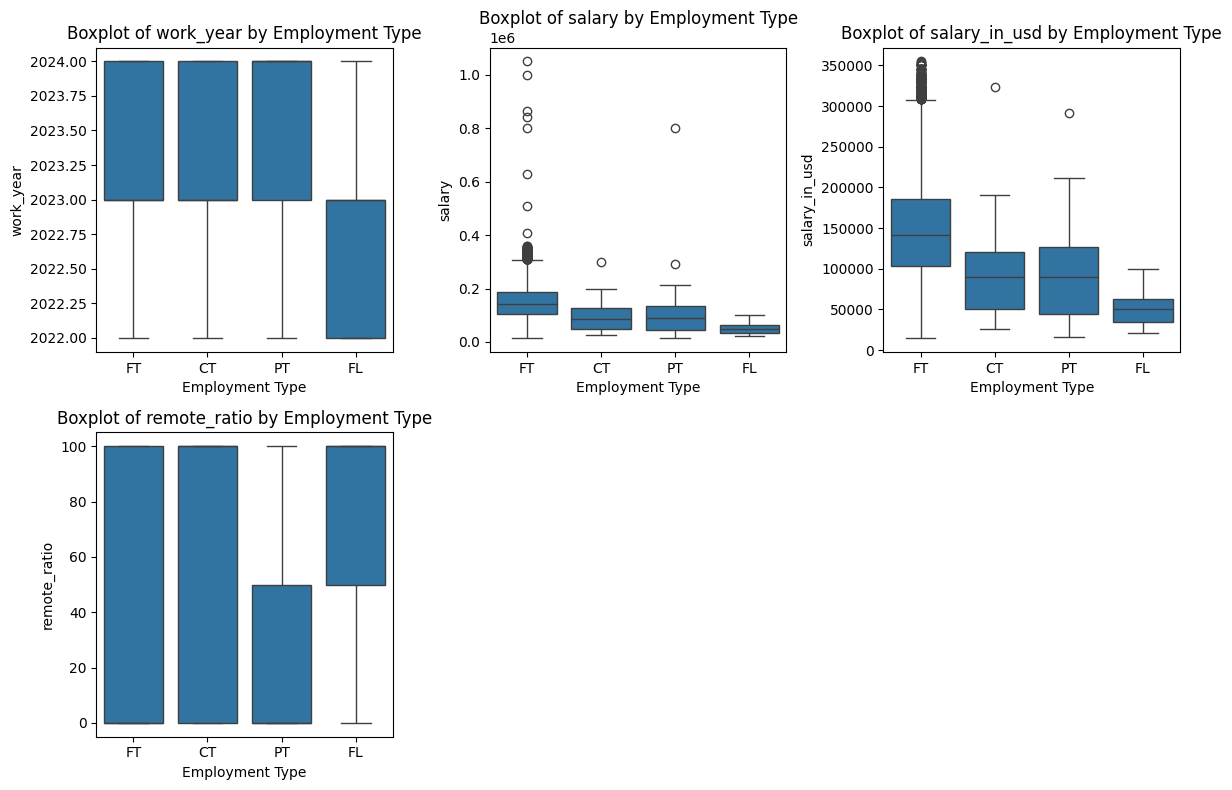

In [21]:
# Boxplot Matrix
# Visualize the distribution of numerical variables across different employment types
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='employment_type', y=col, data=df_no_outliers)
    plt.title(f'Boxplot of {col} by Employment Type')
    plt.xlabel('Employment Type')
    plt.ylabel(col)
plt.tight_layout()
plt.show()